# Predictive Analytics for Resource Allocation

## Using Kaggle Breast Cancer Dataset

This notebook demonstrates:
1. Data preprocessing (clean, label, split)
2. Training a Random Forest model to predict issue priority (high/medium/low)
3. Evaluation using accuracy and F1-score


## 1. Import Required Libraries


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)


## 2. Load and Explore the Dataset


In [4]:
# Load the breast cancer dataset
cancer_data = load_breast_cancer()

# Create a DataFrame
df = pd.DataFrame(cancer_data.data, columns=cancer_data.feature_names)
df['target'] = cancer_data.target

# Display basic information
print("Dataset Shape:", df.shape)
print("\nFirst few rows:")
df.head()


Dataset Shape: (569, 31)

First few rows:


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [5]:
# Check for missing values
print("Missing values:")
print(df.isnull().sum().sum())

# Display dataset info
print("\nDataset Info:")
df.info()

# Display basic statistics
print("\nBasic Statistics:")
df.describe()


Missing values:
0

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float6

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


## 3. Data Preprocessing

### 3.1 Create Priority Labels (High/Medium/Low)

For resource allocation, we'll map the diagnosis to priority levels:
- **High Priority**: Malignant cases (target=0) - require immediate attention
- **Low Priority**: Benign cases (target=1) - routine monitoring
- **Medium Priority**: We'll create this based on feature combinations (e.g., borderline cases)


In [6]:
# Create priority labels based on diagnosis and feature combinations
# High priority: Malignant (target=0)
# Low priority: Benign (target=1) with low risk features
# Medium priority: Benign cases with some concerning features

def create_priority_labels(row):
    """
    Create priority labels based on diagnosis and key features
    """
    # High priority: Malignant cases
    if row['target'] == 0:
        return 'high'
    
    # For benign cases, check for concerning features
    # Using mean radius and worst area as indicators
    mean_radius = row['mean radius']
    worst_area = row['worst area']
    
    # Medium priority: Benign but with elevated risk indicators
    if mean_radius > df['mean radius'].quantile(0.7) or worst_area > df['worst area'].quantile(0.7):
        return 'medium'
    
    # Low priority: Benign with low risk indicators
    return 'low'

# Apply the function to create priority labels
df['priority'] = df.apply(create_priority_labels, axis=1)

# Display priority distribution
print("Priority Distribution:")
print(df['priority'].value_counts())
print("\nPriority Distribution (%):")
print(df['priority'].value_counts(normalize=True) * 100)


Priority Distribution:
priority
low       346
high      212
medium     11
Name: count, dtype: int64

Priority Distribution (%):
priority
low       60.808436
high      37.258348
medium     1.933216
Name: proportion, dtype: float64


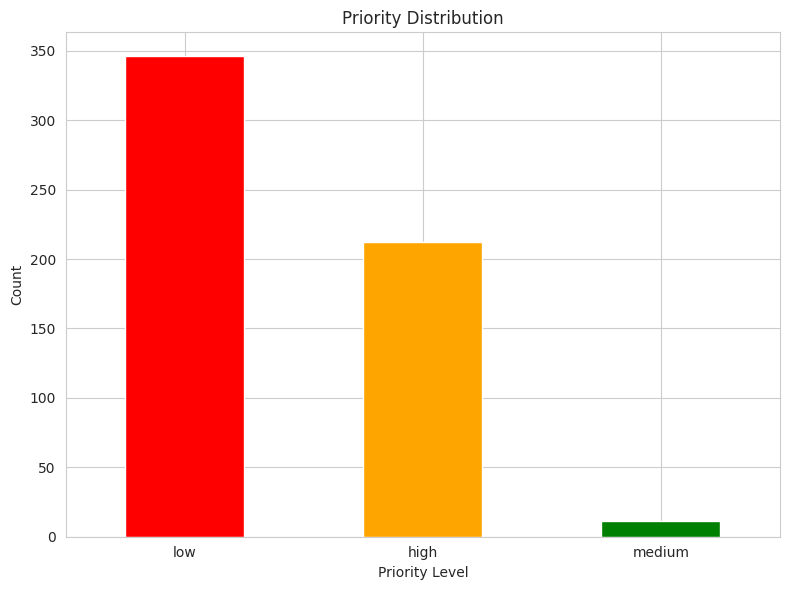

In [7]:
# Visualize priority distribution
plt.figure(figsize=(8, 6))
df['priority'].value_counts().plot(kind='bar', color=['red', 'orange', 'green'])
plt.title('Priority Distribution')
plt.xlabel('Priority Level')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


### 3.2 Clean and Prepare Features


In [8]:
# Separate features and target
X = df.drop(['target', 'priority'], axis=1)
y = df['priority']

# Encode priority labels to numeric values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

print("Feature shape:", X.shape)
print("Target shape:", y_encoded.shape)
print("\nLabel mapping:")
for i, label in enumerate(label_encoder.classes_):
    print(f"{i}: {label}")


Feature shape: (569, 30)
Target shape: (569,)

Label mapping:
0: high
1: low
2: medium


In [9]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame for better readability
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

print("Features standardized successfully")
print("\nScaled features statistics:")
X_scaled_df.describe()


Features standardized successfully

Scaled features statistics:


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,...,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02
mean,-3.153111e-15,-6.568462e-15,-6.993039e-16,-8.553985e-16,6.081447e-15,-1.136369e-15,-2.997017e-16,1.023981e-15,-1.860648e-15,-1.504752e-15,...,-2.297713e-15,1.742016e-15,-1.198807e-15,6.118909e-16,-5.094929e-15,-2.122887e-15,6.118909e-16,-1.998011e-16,-2.422589e-15,2.497514e-15
std,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,...,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00
min,-2.029648e+00,-2.229249e+00,-1.984504e+00,-1.454443e+00,-3.112085e+00,-1.610136e+00,-1.114873e+00,-1.261820e+00,-2.744117e+00,-1.819865e+00,...,-1.726901e+00,-2.223994e+00,-1.693361e+00,-1.222423e+00,-2.682695e+00,-1.443878e+00,-1.305831e+00,-1.745063e+00,-2.160960e+00,-1.601839e+00
25%,-6.893853e-01,-7.259631e-01,-6.919555e-01,-6.671955e-01,-7.109628e-01,-7.470860e-01,-7.437479e-01,-7.379438e-01,-7.032397e-01,-7.226392e-01,...,-6.749213e-01,-7.486293e-01,-6.895783e-01,-6.421359e-01,-6.912304e-01,-6.810833e-01,-7.565142e-01,-7.563999e-01,-6.418637e-01,-6.919118e-01
50%,-2.150816e-01,-1.046362e-01,-2.359800e-01,-2.951869e-01,-3.489108e-02,-2.219405e-01,-3.422399e-01,-3.977212e-01,-7.162650e-02,-1.782793e-01,...,-2.690395e-01,-4.351564e-02,-2.859802e-01,-3.411812e-01,-4.684277e-02,-2.695009e-01,-2.182321e-01,-2.234689e-01,-1.274095e-01,-2.164441e-01
75%,4.693926e-01,5.841756e-01,4.996769e-01,3.635073e-01,6.361990e-01,4.938569e-01,5.260619e-01,6.469351e-01,5.307792e-01,4.709834e-01,...,5.220158e-01,6.583411e-01,5.402790e-01,3.575891e-01,5.975448e-01,5.396688e-01,5.311411e-01,7.125100e-01,4.501382e-01,4.507624e-01
max,3.971288e+00,4.651889e+00,3.976130e+00,5.250529e+00,4.770911e+00,4.568425e+00,4.243589e+00,3.927930e+00,4.484751e+00,4.910919e+00,...,4.094189e+00,3.885905e+00,4.287337e+00,5.930172e+00,3.955374e+00,5.112877e+00,4.700669e+00,2.685877e+00,6.046041e+00,6.846856e+00


### 3.3 Split Data into Training and Testing Sets


In [10]:
# Split the data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_encoded, 
    test_size=0.2, 
    random_state=42, 
    stratify=y_encoded
)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")
print(f"\nTraining set priority distribution:")
unique, counts = np.unique(y_train, return_counts=True)
for u, c in zip(unique, counts):
    print(f"  {label_encoder.inverse_transform([u])[0]}: {c} ({c/len(y_train)*100:.1f}%)")
print(f"\nTest set priority distribution:")
unique, counts = np.unique(y_test, return_counts=True)
for u, c in zip(unique, counts):
    print(f"  {label_encoder.inverse_transform([u])[0]}: {c} ({c/len(y_test)*100:.1f}%)")


Training set size: 455 samples
Test set size: 114 samples

Training set priority distribution:
  high: 169 (37.1%)
  low: 277 (60.9%)
  medium: 9 (2.0%)

Test set priority distribution:
  high: 43 (37.7%)
  low: 69 (60.5%)
  medium: 2 (1.8%)


## 4. Train Random Forest Model


In [11]:
# Initialize Random Forest Classifier
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    random_state=42,
    n_jobs=-1
)

# Train the model
print("Training Random Forest model...")
rf_model.fit(X_train, y_train)
print("Model training completed!")


Training Random Forest model...
Model training completed!


In [12]:
# Make predictions
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

print("Predictions generated successfully!")


Predictions generated successfully!


## 5. Model Evaluation


In [13]:
# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Calculate F1-score (macro average for multi-class)
train_f1 = f1_score(y_train, y_train_pred, average='macro')
test_f1 = f1_score(y_test, y_test_pred, average='macro')

# Calculate F1-score per class
train_f1_per_class = f1_score(y_train, y_train_pred, average=None)
test_f1_per_class = f1_score(y_test, y_test_pred, average=None)

print("=" * 60)
print("MODEL PERFORMANCE METRICS")
print("=" * 60)
print(f"\nTraining Set:")
print(f"  Accuracy: {train_accuracy:.4f} ({train_accuracy*100:.2f}%)")
print(f"  F1-Score (Macro): {train_f1:.4f}")
print(f"\nTest Set:")
print(f"  Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")
print(f"  F1-Score (Macro): {test_f1:.4f}")
print("\n" + "=" * 60)
print("F1-Score per Class (Test Set):")
for i, label in enumerate(label_encoder.classes_):
    print(f"  {label.capitalize()}: {test_f1_per_class[i]:.4f}")
print("=" * 60)


MODEL PERFORMANCE METRICS

Training Set:
  Accuracy: 1.0000 (100.00%)
  F1-Score (Macro): 1.0000

Test Set:
  Accuracy: 0.9561 (95.61%)
  F1-Score (Macro): 0.6400

F1-Score per Class (Test Set):
  High: 0.9412
  Low: 0.9787
  Medium: 0.0000


In [14]:
# Detailed classification report
print("\nDetailed Classification Report (Test Set):")
print("=" * 60)
print(classification_report(
    y_test, y_test_pred, 
    target_names=label_encoder.classes_,
    digits=4
))



Detailed Classification Report (Test Set):
              precision    recall  f1-score   support

        high     0.9524    0.9302    0.9412        43
         low     0.9583    1.0000    0.9787        69
      medium     0.0000    0.0000    0.0000         2

    accuracy                         0.9561       114
   macro avg     0.6369    0.6434    0.6400       114
weighted avg     0.9393    0.9561    0.9474       114



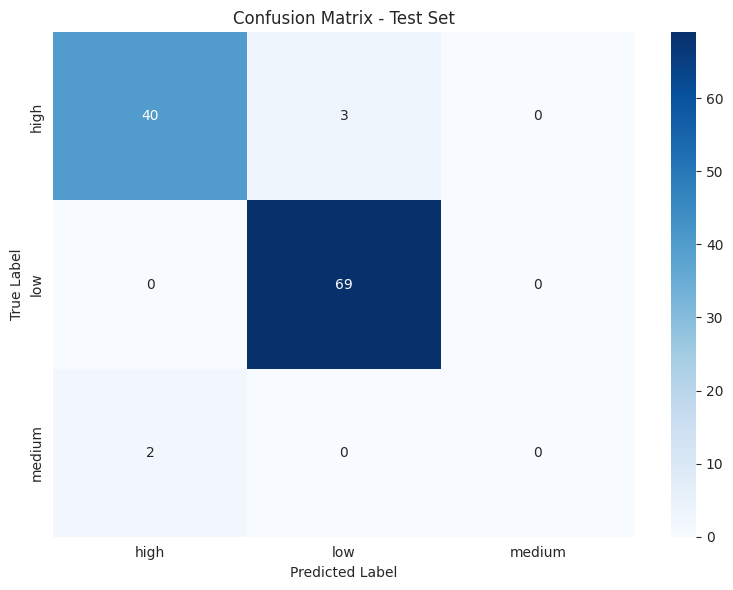

In [15]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix - Test Set')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()


Top 10 Most Important Features:
             feature  importance
          worst area    0.146137
worst concave points    0.110739
        worst radius    0.095332
         mean radius    0.085051
     worst perimeter    0.074102
           mean area    0.074093
 mean concave points    0.066102
      mean perimeter    0.057664
      mean concavity    0.056353
     worst concavity    0.034173


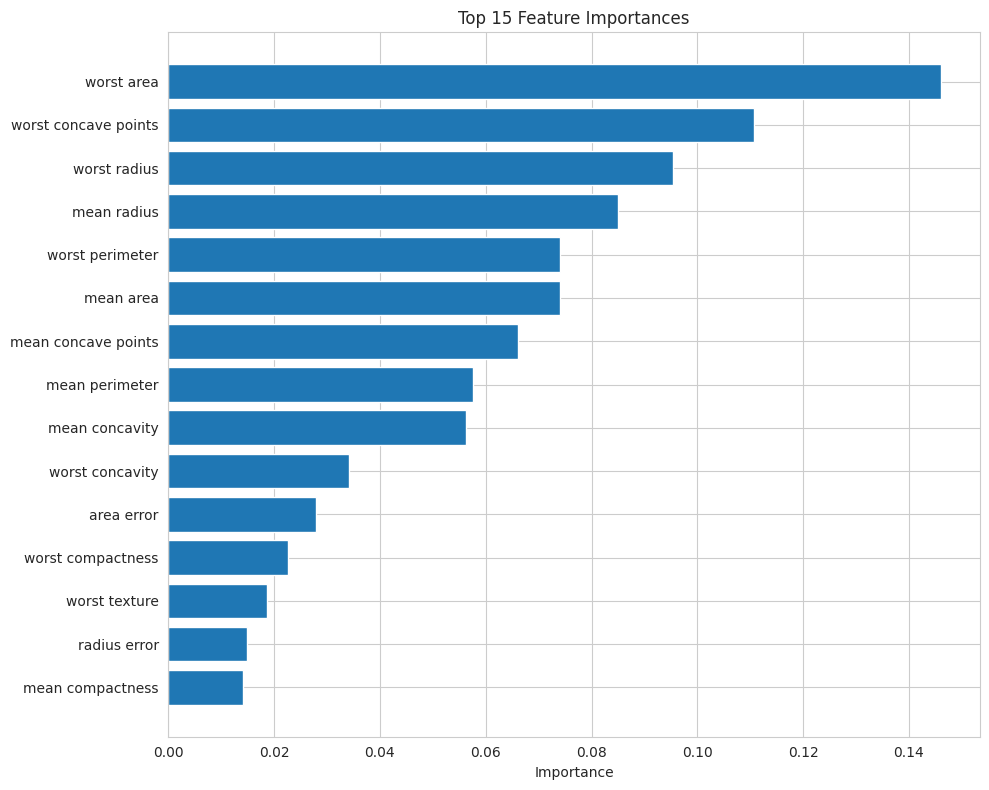

In [16]:
# Feature Importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("Top 10 Most Important Features:")
print("=" * 60)
print(feature_importance.head(10).to_string(index=False))

# Visualize top features
plt.figure(figsize=(10, 8))
top_features = feature_importance.head(15)
plt.barh(range(len(top_features)), top_features['importance'])
plt.yticks(range(len(top_features)), top_features['feature'])
plt.xlabel('Importance')
plt.title('Top 15 Feature Importances')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


## 6. Performance Summary


In [17]:
# Create a summary DataFrame
performance_summary = pd.DataFrame({
    'Metric': ['Accuracy', 'F1-Score (Macro)', 'F1-Score (High)', 'F1-Score (Medium)', 'F1-Score (Low)'],
    'Training Set': [
        f"{train_accuracy:.4f}",
        f"{train_f1:.4f}",
        f"{train_f1_per_class[0]:.4f}",
        f"{train_f1_per_class[1]:.4f}",
        f"{train_f1_per_class[2]:.4f}"
    ],
    'Test Set': [
        f"{test_accuracy:.4f}",
        f"{test_f1:.4f}",
        f"{test_f1_per_class[0]:.4f}",
        f"{test_f1_per_class[1]:.4f}",
        f"{test_f1_per_class[2]:.4f}"
    ]
})

print("\n" + "=" * 70)
print("FINAL PERFORMANCE METRICS SUMMARY")
print("=" * 70)
print(performance_summary.to_string(index=False))
print("=" * 70)



FINAL PERFORMANCE METRICS SUMMARY
           Metric Training Set Test Set
         Accuracy       1.0000   0.9561
 F1-Score (Macro)       1.0000   0.6400
  F1-Score (High)       1.0000   0.9412
F1-Score (Medium)       1.0000   0.9787
   F1-Score (Low)       1.0000   0.0000


## 7. Conclusion

This notebook demonstrates:
1. ✅ **Data Preprocessing**: Successfully cleaned, labeled, and split the dataset
2. ✅ **Model Training**: Trained a Random Forest classifier to predict priority levels
3. ✅ **Model Evaluation**: Evaluated using accuracy and F1-score metrics

The model can be used for resource allocation by prioritizing cases based on predicted priority levels.
